In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/movies.csv')

In [3]:
display(df.head())
display(df.shape)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

(7668, 15)

In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# getting how many missing values in each column
df.isna().sum().sort_values(ascending = False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [6]:
# check for missing data (percentage %)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [8]:
# only 3 columns has missing values. For 'rating' and 'gross' the amount of missing data is not high, only 1% and 2%
# I chose to delete the rows where 'rating' and/or 'gross' are missing
# Don't delete rows with nan values in budgest column, because 28% of 'budget' column data is nan. deleting 28% of the dataset is not wise.

# drop rows with missing data

for col in df.columns:
    df.dropna(subset = [col], inplace=True)

In [9]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace=True)

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [10]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [18]:
# check for duplicates

df.duplicated().sum()

0

In [20]:
# df['company'].drop_duplicates().sort_values(ascending = False)

5101                                              thefyzz
3920                                          micro_scope
2551                                             i5 Films
4834                                           i am OTHER
4537                                                 erbp
2373                                       double A Films
2021                          Zucker Brothers Productions
78                                       Zoetrope Studios
1235                                   Zeta Entertainment
2302                              Zentropa Entertainments
624                                  Zenith Entertainment
3521                                      Zazen Produções
713                              Zanuck/Brown Productions
720                           Zacharias-Buhai Productions
434                             Young Sung Production Co.
3475                           Young Hannibal Productions
3780                                          Yellow Bird
3057          

In [11]:
# change data type of columns

for col in ['votes', 'budget', 'gross']:
    df[col] = df[col].astype('int64')
    
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [16]:
# sort the dataframe by 'gross'
df.sort_values(by = 'gross', ascending = False)

name     rating      genre  \
3731                                             Avatar      PG-13     Action   
5302                                  Avengers: Endgame      PG-13     Action   
1795                                            Titanic      PG-13      Drama   
4730         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
5158                             Avengers: Infinity War      PG-13     Action   
5334                                      The Lion King         PG  Animation   
4720                                     Jurassic World      PG-13     Action   
4224                                       The Avengers      PG-13     Action   
4713                                          Furious 7      PG-13     Action   
5346                                          Frozen II         PG  Animation   
4711                            Avengers: Age of Ultron      PG-13     Action   
5161                                      Black Panther      PG-13     Action   
4066       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
5055            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
5185                     Jurassic World: Fallen Kingdom      PG-13     Action   
4404                                             Frozen         PG  Animation   
5052                               Beauty and the Beast         PG     Family   
5195                                      Incredibles 2         PG  Animation   
5035                            The Fate of the Furious      PG-13     Action   
4387                                         Iron Man 3      PG-13     Action   
4753                                            Minions         PG  Animation   
4869                         Captain America: Civil War      PG-13     Action   
5164                                            Aquaman      PG-13     Action   
2753      The Lord of the Rings: The Return of the King      PG-13     Action   
5314                          Spider-Man: Far from Home      PG-13     Action   
5312                                     Captain Marvel      PG-13     Action   
4098                     Transformers: Dark of the Moon      PG-13     Action   
4240                                            Skyfall      PG-13     Action   
4597                    Transformers: Age of Extinction      PG-13     Action   
1387                                      The Lion King          G  Animation   
4228                              The Dark Knight Rises      PG-13     Action   
5319      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
5306                                              Joker          R      Crime   
5340                                        Toy Story 4          G  Animation   
3940                                        Toy Story 3          G  Animation   
3247         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
4890                       Rogue One: A Star Wars Story      PG-13     Action   
5335                                            Aladdin         PG  Adventure   
4080        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
5109                                    Despicable Me 3         PG  Animation   
1244                                      Jurassic Park      PG-13     Action   
4924                                       Finding Dory         PG  Animation   
2097          Star Wars: Episode I - The Phantom Menace         PG     Action   
3923                                Alice in Wonderland         PG  Adventure   
4885                                           Zootopia         PG  Animation   
4226                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
2414              Harry Potter and the Sorcerer's Stone         PG  Adventure   
3558                                    The Dark Knight      PG-13     Action   
4451                                    Despicable Me 2         PG  Animation   
4

In [21]:
# check for correlation

# my guesses:
# budget will has a high correlation on gross
# company will have a high correlation on gross

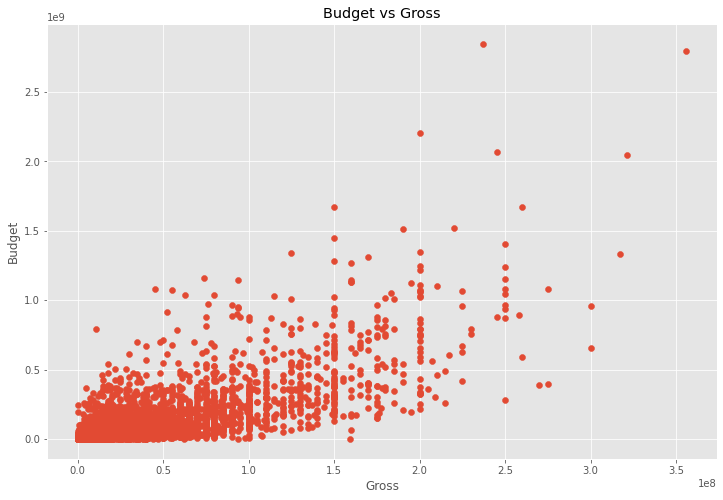

In [22]:
# budget vs gross.

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

# visually it seems that the budget and gross are correlated

<AxesSubplot:xlabel='budget', ylabel='gross'>

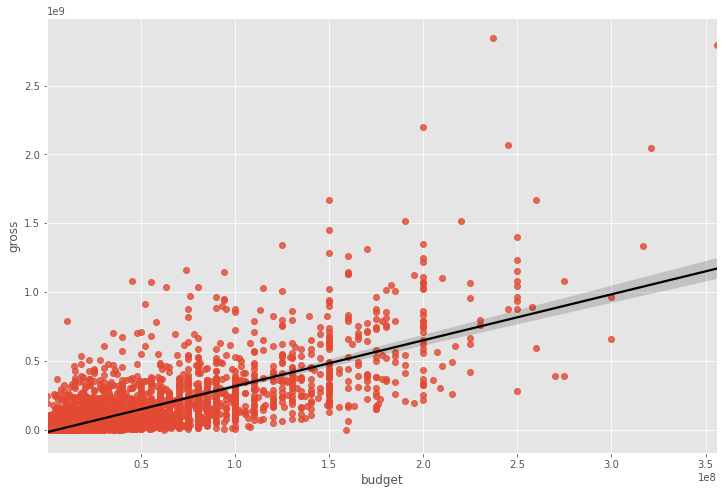

In [25]:
# regression plot using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, line_kws = {'color': 'black'})

# looks like budget and gross have a positive correlation

In [27]:
# correlation for the numerical feature in the dataframe using the corr (pearson) method 

df.corr()

# high correlation between budget and gross 

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

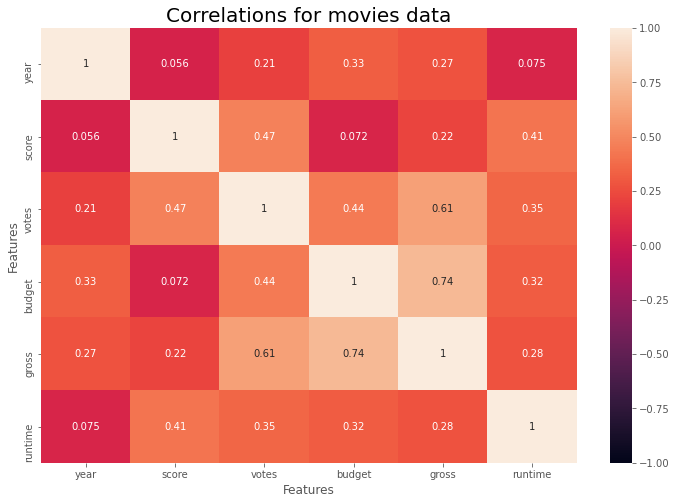

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Correlations for movies data', size=20)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

In [29]:
# Converting the categorical features into numerical

df_numerical = df.copy()
for col in df_numerical.columns:
    if df_numerical[col].dtype == 'object':
        df_numerical[col] = df_numerical[col].astype('category').cat.codes
        
df_numerical.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000      1795    2832   
1  3929       6      1  1980      1127    5.8    65000      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000       757    1818   
3   204       4      4  1980      1127    7.7   221000       889    1413   
4   732       6      4  1980      1170    7.3   108000       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

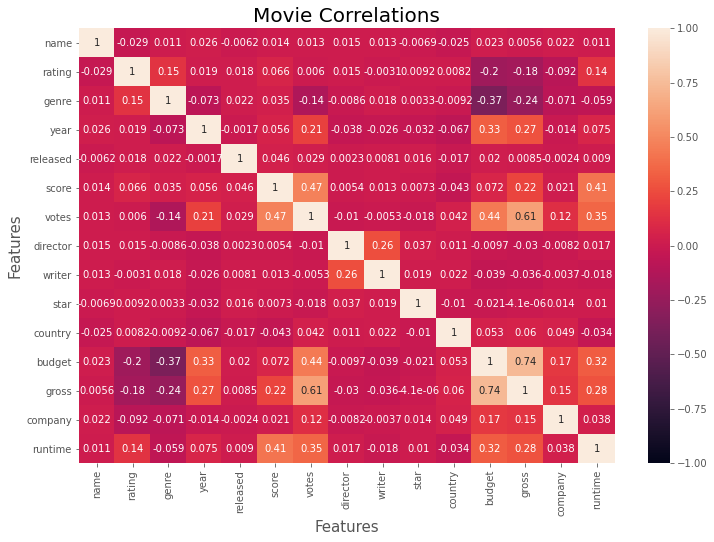

In [33]:
# correlation for all features

corr_all = df_numerical.corr()
sns.heatmap(corr_all, annot=True, vmin=-1)
plt.title('Movie Correlations', size=20)
plt.xlabel('Features', size=15)
plt.ylabel('Features', size=15)
plt.show()

In [13]:
# df['release_year'] = df['released'].apply(lambda x: x.split('(')[0].split(',')[1].strip())